# <center>${\textbf{Artificial Intelligence Decision Support System}}$<br>${\textbf{ for Groundwater Management under Climate Change:}}$</center><br><center>${\textbf{ Application to Mornag Region in Tunisia}}$</center><br><center>${\textbf{Part 4 : Deployment Using LSTM}}$</center>


**Table of Contents**
* [Importing Libraries](#libraris)
* [Forecasting under Climate Change scenarios](#cc)
    * [Representative Concentration Pathway :RCP 4.5](#rcp4.5_1)
    * [Representative Concentration Pathway :RCP 8.5](#rcp8.5_1)

    

<a id="libraries"></a>

${\textbf{Importing Libraries}}$

In [1]:
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

import pickle

import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
Historical_Data = pd.read_pickle('./Pickles/Data/Historical_Data.pkl')
LSTM = tf.keras.models.load_model('./Pickles/Models/my_modelLSTM.h5')

<a id="cc"></a>

## ${\textbf{LSTM Forecasting under Climate Change scenarios}}$

In [3]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)

<a id="rcp4.5_1"></a>

>${\textbf{Representative Concentration Pathway :RCP 4.5 }}$

In [4]:
RCP45 = pd.read_pickle('./Pickles/Data/RCP45.pkl')
del RCP45['MonthlyRF']
RCP45.rename(columns = {'Mean':'MonthlyRF'}, inplace = True)#Renaming Zone_num to zone for more clarity

In [5]:
del RCP45['Lat']
del RCP45['Lon']
del RCP45['Lat_Pluviometer']
del RCP45['Lon_Pluviometer']

In [6]:
lb_make = LabelEncoder()
RCP45["Piezometer"] = lb_make.fit_transform(RCP45["Piezometer"])
lb_make1 = LabelEncoder()
RCP45["Pluviometer"] = lb_make1.fit_transform(RCP45["Pluviometer"])
lb_make2 = LabelEncoder()
RCP45["SPI_classes"] = lb_make2.fit_transform(RCP45["SPI_classes"])
RCP45['Pz']=0

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
RCP45_scaled = scaler.fit_transform(RCP45)

In [8]:
X,Y=createXY(RCP45_scaled,30)

In [9]:
prediction=LSTM.predict(X)
prediction_copies_array = np.repeat(prediction,12, axis=-1)
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),12)))[:,0]

RCP45["Piezometer"] = lb_make.inverse_transform(RCP45["Piezometer"])
RCP45["Pluviometer"] = lb_make1.inverse_transform(RCP45["Pluviometer"])
RCP45["SPI_classes"] = lb_make2.inverse_transform(RCP45["SPI_classes"])
RCP45=RCP45[30:]
RCP45["Pz"]=pred

5382/5382 [==============================] - 19s 3ms/step


In [10]:
RCP45

,Piezometer,Pluviometer,YearlyRF,SemestrialRF,TrimestrialRF,MonthlyRF,Zone,SPI,SPI_classes,Month,Year,Pz
date,,,,,,,,,,,,
2009-06-01,Ben Zazia,BEN AROUS I MUNICIPA,411.898182,273.444545,114.956364,50.622727,4,1.080398,Very wet,6,2009,32.227219
2009-06-01,Fraj,BEN AROUS I MUNICIPA,411.898182,273.444545,114.956364,50.622727,4,1.080398,Very wet,6,2009,9.997550
2009-06-01,Bir El Kif,BEN AROUS I MUNICIPA,411.898182,273.444545,114.956364,50.622727,4,1.080398,Very wet,6,2009,14.223544
2009-06-01,El Attar,BEN AROUS I MUNICIPA,411.898182,273.444545,114.956364,50.622727,4,1.080398,Very wet,6,2009,10.789429
2009-06-01,Majoul,BEN AROUS I MUNICIPA,411.898182,273.444545,114.956364,50.622727,4,1.080398,Very wet,6,2009,13.514144
...,...,...,...,...,...,...,...,...,...,...,...,...
2100-12-01,UCP Ouzra,OUZRA AGRI FLORA,312.445465,149.702278,97.629775,31.990834,1,-0.000486,Moderately dry,12,2100,12.931515
2100-12-01,Salah Khamar,OUZRA AGRI FLORA,312.445465,149.702278,97.629775,31.990834,1,-0.000486,Moderately dry,12,2100,37.475674
2100-12-01,Haj Hadi Jani,OUZRA AGRI FLORA,312.445465,149.702278,97.629775,31.990834,1,-0.000486,Moderately dry,12,2100,35.392658


Hamadi Belarbi


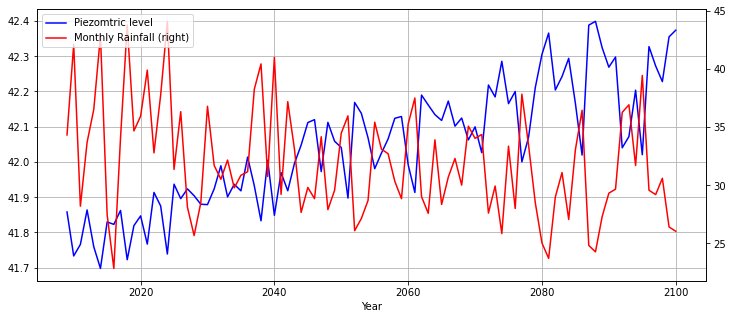

INRAT


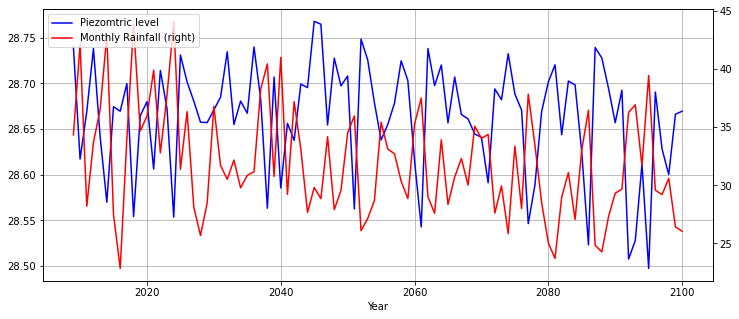

Majoul


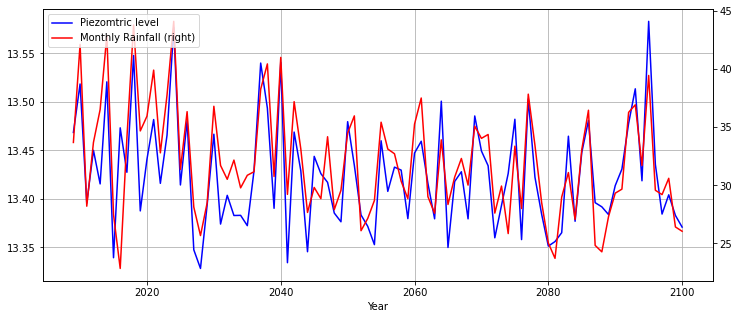

Delagi


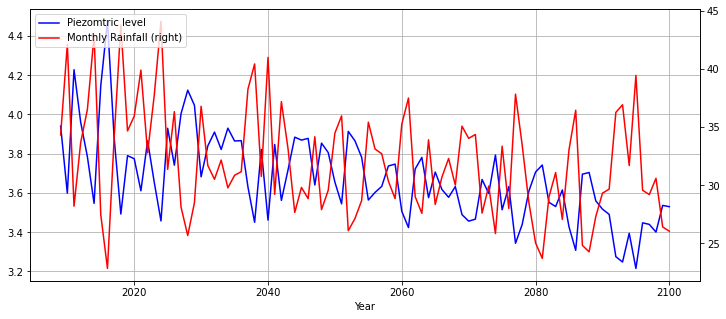

In [11]:
list_nom = ['Hamadi Belarbi','INRAT','Majoul','Delagi']
# plt.rcParams['font.size'] = '16'
for d in list_nom:
    df=RCP45[RCP45.Piezometer==d]
    print(d)
    df=df.reset_index()
    df.index=df.date
    plt.figure(figsize=(12,5))
    plt.xlabel('Number of requests every 10 minutes')

    ax1 = df.groupby('Year')['Pz'].mean().plot(color='blue', grid=True, label='Piezomtric level')
    ax2 = df.groupby('Year')['MonthlyRF'].mean().plot(color='red', grid=True, secondary_y=True, label='Monthly Rainfall')
    
    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()


    plt.legend(h1+h2, l1+l2, loc=2)
    plt.show()

<a id="rcp8.5_1"></a>

>${\textbf{Representative Concentration Pathway :RCP 8.5 }}$

In [12]:
RCP85 = pd.read_pickle('./Pickles/Data/RCP85.pkl')
del RCP85['MonthlyRF']
RCP85.rename(columns = {'Mean':'MonthlyRF'}, inplace = True)#Renaming Zone_num to zone for more clarity

In [13]:
del RCP85['Lat']
del RCP85['Lon']
del RCP85['Lat_Pluviometer']
del RCP85['Lon_Pluviometer']

In [14]:
lb_make = LabelEncoder()
RCP85["Piezometer"] = lb_make.fit_transform(RCP85["Piezometer"])
lb_make1 = LabelEncoder()
RCP85["Pluviometer"] = lb_make1.fit_transform(RCP85["Pluviometer"])
lb_make2 = LabelEncoder()
RCP85["SPI_classes"] = lb_make2.fit_transform(RCP85["SPI_classes"])
RCP85['Pz']=0

In [15]:
scaler = MinMaxScaler(feature_range=(0,1))
RCP85_scaled = scaler.fit_transform(RCP85)

In [16]:
X,Y=createXY(RCP85_scaled,30)

In [17]:
prediction=LSTM.predict(X)
prediction_copies_array = np.repeat(prediction,12, axis=-1)
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),12)))[:,0]

RCP85["Piezometer"] = lb_make.inverse_transform(RCP85["Piezometer"])
RCP85["Pluviometer"] = lb_make1.inverse_transform(RCP85["Pluviometer"])
RCP85["SPI_classes"] = lb_make2.inverse_transform(RCP85["SPI_classes"])
RCP85=RCP85[30:]
RCP85["Pz"]=pred

5382/5382 [==============================] - 19s 4ms/step


In [18]:
RCP85

,Piezometer,Pluviometer,YearlyRF,SemestrialRF,TrimestrialRF,MonthlyRF,Zone,SPI,SPI_classes,Month,Year,Pz
date,,,,,,,,,,,,
2009-06-01,Ben Zazia,BEN AROUS I MUNICIPA,354.381818,216.021818,81.213636,32.347273,4,0.094985,Moderately Wet,6,2009,31.990517
2009-06-01,Fraj,BEN AROUS I MUNICIPA,354.381818,216.021818,81.213636,32.347273,4,0.094985,Moderately Wet,6,2009,10.339226
2009-06-01,Bir El Kif,BEN AROUS I MUNICIPA,354.381818,216.021818,81.213636,32.347273,4,0.094985,Moderately Wet,6,2009,13.773941
2009-06-01,El Attar,BEN AROUS I MUNICIPA,354.381818,216.021818,81.213636,32.347273,4,0.094985,Moderately Wet,6,2009,10.694358
2009-06-01,Majoul,BEN AROUS I MUNICIPA,354.381818,216.021818,81.213636,32.347273,4,0.094985,Moderately Wet,6,2009,13.143197
...,...,...,...,...,...,...,...,...,...,...,...,...
2100-12-01,UCP Ouzra,OUZRA AGRI FLORA,287.226304,132.698606,84.353849,27.523707,1,-0.192284,Moderately dry,12,2100,12.847670
2100-12-01,Salah Khamar,OUZRA AGRI FLORA,287.226304,132.698606,84.353849,27.523707,1,-0.192284,Moderately dry,12,2100,37.462105
2100-12-01,Haj Hadi Jani,OUZRA AGRI FLORA,287.226304,132.698606,84.353849,27.523707,1,-0.192284,Moderately dry,12,2100,35.526566


Hamadi Belarbi


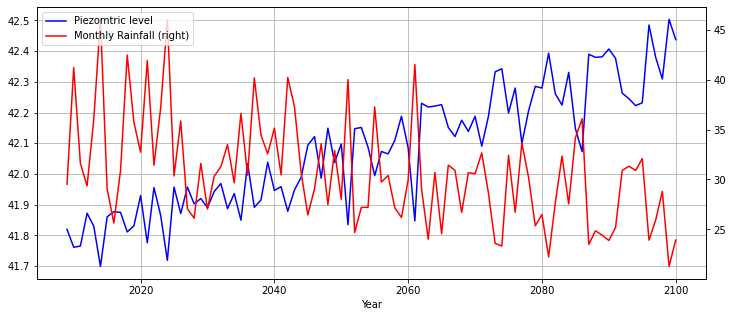

INRAT


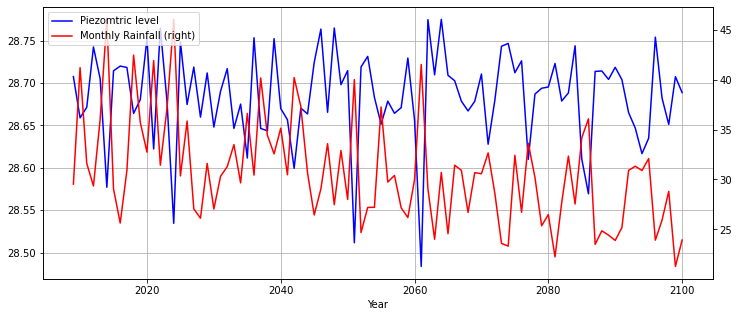

Majoul


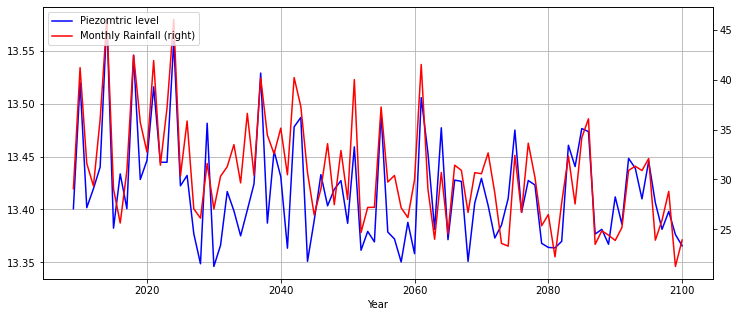

Delagi


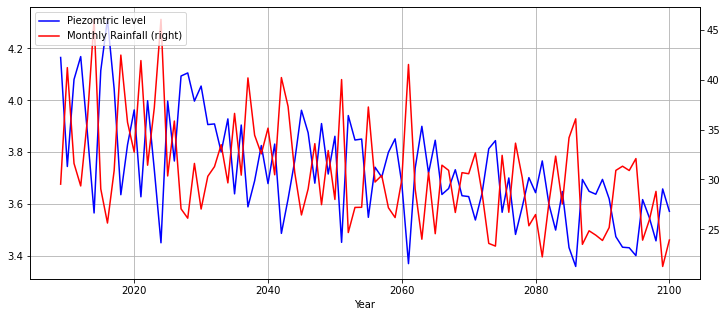

In [23]:
list_nom = ['Hamadi Belarbi','INRAT','Majoul','Delagi']
# plt.rcParams['font.size'] = '16'
for d in list_nom:
    df=RCP85[RCP85.Piezometer==d]
    print(d)
    df=df.reset_index()
    df.index=df.date
    plt.figure(figsize=(12,5))
    plt.xlabel('Number of requests every 10 minutes')

    ax1 = df.groupby('Year')['Pz'].mean().plot(color='blue', grid=True, label='Piezomtric level')
    ax2 = df.groupby('Year')['MonthlyRF'].mean().plot(color='red', grid=True, secondary_y=True, label='Monthly Rainfall')
    
    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()


    plt.legend(h1+h2, l1+l2, loc=2)
    plt.show()